In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt


def distance(p1,p2):
    p1=np.array(p1)
    p2=np.array(p2)
    return np.sqrt(np.sum(np.power(p1-p2,2)))

In [20]:
def find_nearest_neibors(p,points,k):
    distances=np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances) 
    return ind[:k] 
  

points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p=np.array([2.5,2])

print(find_nearest_neibors(p,points,k=2))
print(points[ind])

[4 7]
[[2 2]
 [3 2]]


In [23]:
def majority_vote(votes):    
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1

    winners=[]
    max_counter=max(vote_counts.values())
    for vote, count in vote_counts.items():
        if max_counter==count:
            winners.append(vote)
    return random.choice(winners) 


print (majority_vote([1,2,3,2,1,1,2,3]))

def majority_vote_short(votes):
    
    mode, count = ss.mstats.mode(votes)
    return mode

print (majority_vote_short([1,2,3,2,1,1,2,3]))


2
[1.]


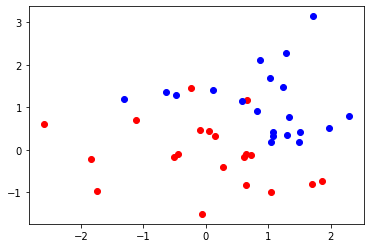

In [26]:
def knn_predict(p,points,outcomes,k):
    ind=find_nearest_neibors(p,points,k)
    return majority_vote(outcomes[ind])
    
outcomes = np.array([0,0,0,0,1,1,1,1,1])
#print (knn_predict(np.array([2.5,2.7]),points,outcomes,k=2))
    
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

def generate_synth_data(n=50):
    
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

n=20
points,outcomes=generate_synth_data(n=20)
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("bivardata.pdf.pdf")


In [29]:
import numpy as np
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """classify each point on the prediction grid."""
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy = np.meshgrid(xs,ys)

    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)

    return (xx,yy,prediction_grid)


In [ ]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap ,s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

(predictors,outcomes)=generate_synth_data()

k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)


k=50;filename="knn_synth_50.pdf";limits=(-3,4,-3,4) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)
